### Adv. Hydrology Project:
---

#### What are the impacts of using remotely sensed incoming radiation data (CERES) versus in situ measurements (CUES) on modeling temporal snow patterns?

SUMMA model sensitivity analysis comparing model runs using radiation forcing data from:
* [CUES snow study site data](https://snow.ucsb.edu/)
* [CERES remote sensing derived products](https://eosweb.larc.nasa.gov/project/ceres/syn1deg-day_ed4a)

Snow pattern evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature
***

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path
import xarray as xr
import pandas as pd
from datetime import datetime

In [16]:
summa_executable = 'summa.exe'
# file manager for CUES model runs
case_path = '/home/jovyan/cues'
filemanager_path = os.path.join(case_path, 'summa_setup/cues_file_manager.txt')

In [25]:
# CUES simulation setup
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)
# set the simulation start and finish times
S.decisions.simulStart.set_value("2010-10-01 00:00")
S.decisions.simulFinsh.set_value("2017-08-01 22:00")

In [26]:
# run CUES simulation
S.start(run_option='local', run_suffix='cues')
S.monitor()

False

In [28]:
# Look at output
#print('stdout:\n-------\n{}\n========\n'.format(S.stdout))
#print('stderr:\n-------\n{}\n========\n'.format(S.stderr))

***
### Model run with CERES radiation forcing data:

In [29]:
# CUES-CERES simulation setup
filemanager_path = os.path.join(case_path, 'summa_setup/ceres_file_manager.txt')
S_ceres = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)
# set the simulation start and finish times
S_ceres.decisions.simulStart.set_value("2010-10-01 00:00")
S_ceres.decisions.simulFinsh.set_value("2017-08-01 22:00")

In [30]:
# Run CUES-CERES simulation
S_ceres.start(run_option='local', run_suffix='cues-ceres')
S_ceres.monitor()

False

***
### Compare the two model runs:

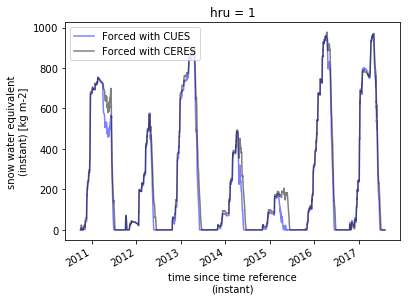

In [37]:
# Plot SWE timelines
S.output.scalarSWE.plot(color='b',linestyle='-',alpha=0.5,label='Forced with CUES')
S_ceres.output.scalarSWE.plot(color='k',linestyle='-',alpha=0.5,label='Forced with CERES')
plt.legend(loc='upper left');

In [12]:
# compare April 1st SWE
# compare peak SWE accumulation
# compare SWE accumulation curves
# compare SWE depletion curves
# compare snow disappearance date
# compare snow surface temperature